# Kansverdelingen


In dit notebook vind je de opdrachten over kansverdeling.
- <a href="#kv_opdracht1"> Opdracht 1 </a> maak je ter voorbereiding op het college.
- <a href="#kv_opdracht2"> Opdracht 2 </a> maken we in het college.

<a id="kv_opdracht1"></a>
## Opdracht 1

In [1]:
import numpy as np
import scipy.stats as stats

## Voorbeeld - bananen 
Gegeven is een kansverdeling voor het gewicht van bananen met de volgende eigenschappen:
- µ = ‘mu’ = gemiddelde = 50 gr
- σ = ‘sigma’ = standaard deviatie = 7,5 gram

Voor normaalverdeling gelden de volgende regels:

Bij 90% hoort -/+ 1,64 σ

Bij 95% hoort -/+ 1,96 σ

Bij 99% hoort -/+ 2,58 σ

Bepaal met de hand: 
* 90% weegt tussen de …… en …... gram
- 99% weegt tussen de …… en …… gram 
- 5% weegt meer dan …… gram
- 5% weegt minder dan …… gram
- 95% weegt minder dan …… gram

In [2]:
# Berekening van kans naar waarde
mu, sigma = 50, 7.5

# scipy.stats functies
nv = stats.norm(loc=mu,scale=sigma)
print(nv.ppf(0.025))   # 2,5%
print(nv.ppf(0.975))   # 97,5%

print("90% weegt tussen de", nv.ppf(0.05), "en", nv.ppf(0.95), "gram")
print("90% weegt tussen de", mu-1.64*sigma, "en", mu+1.64*sigma, "gram")
print()
print("99% weegt tussen de", nv.ppf(0.005), "en", nv.ppf(0.995), "gram")
print("99% weegt tussen de", mu-2.58*sigma, "en", mu+2.58*sigma, "gram")
print()
print("5% weegt meer dan", nv.ppf(0.95), "gram")
print("5% weegt meer dan", mu+1.64*sigma, "gram")
print()
print("5% weegt minder dan", nv.ppf(0.05), "gram")
print("5% weegt minder dan", mu-1.64*sigma, "gram")
print()
print("95% weegt minder dan", nv.ppf(0.95), "gram")
print("95% weegt minder dan", mu+1.64*sigma, "gram")

35.30027011594959
64.69972988405041
90% weegt tussen de 37.66359779786396 en 62.33640220213604 gram
90% weegt tussen de 37.7 en 62.3 gram

99% weegt tussen de 30.681280223383244 en 69.31871977661675 gram
99% weegt tussen de 30.65 en 69.35 gram

5% weegt meer dan 62.33640220213604 gram
5% weegt meer dan 62.3 gram

5% weegt minder dan 37.66359779786396 gram
5% weegt minder dan 37.7 gram

95% weegt minder dan 62.33640220213604 gram
95% weegt minder dan 62.3 gram


## Oefening normale verdeling - bananen

Kansverdeling bananen, met µ = 50 gram en σ = 7,5 gram

Bereken met de functies van `scipy.stats`:

- 5% weegt minder dan ... gram
- de middelste 90% weegt tussen de ... en ... gram
- het derde kwart weegt tussen de ... en ... gram
- ...% weegt meer dan 40 gram
- ...% weegt tussen de 61 en 73 gram

In [3]:
# Berekening van kans naar waarde
mu, sigma = 50, 7.5

# scipy.stats functies
nv = stats.norm(loc=mu,scale=sigma)

print("5% weegt minder dan {:.2f} gram".format(nv.ppf(0.05)))
print("middelste 90% weegt tussen de {:.2f} en {:.2f} gram".format(nv.ppf(0.05), nv.ppf(0.95)))
print("derde kwart weegt tussen de {:.2f} en {:.2f} gram".format(nv.ppf(0.5), nv.ppf(0.75)))
print("{:.2f}% weegt meer dan 40 gram".format((1-nv.cdf(40))*100))
print("{:.2f}% weegt tussen de 61 en 73 gram".format((nv.cdf(73) - nv.cdf(61))*100))

5% weegt minder dan 37.66 gram
middelste 90% weegt tussen de 37.66 en 62.34 gram
derde kwart weegt tussen de 50.00 en 55.06 gram
90.88% weegt meer dan 40 gram
7.02% weegt tussen de 61 en 73 gram


<a id = "kv_opdracht2"></a>
## Opdracht 2 - toetsuitslagen


In deze opdracht gaan we de toetsuitslagen analyseren van het eerstejaarsvak Programming (PROG).

De tentamenuitslagen zijn beschikbaar gesteld in een Excelbestand: uitslag_prog.xlsx

### Deel 1. Libraries importeren

We zullen voor de analyses gebruik maken van `pandas` en `matplotlib`. Importeer hiervoor de juiste biblioteheken.
Matplotlib is standaard geinstalleerd als je Anaconda gebruikt. In de overige gevallen kun je Matplotlib als volgt installeren:

1. Open een terminal: Win+R -> cmd -> enter: pip install matplotlib
2. Installeer via de anaconda package manager: conda install matplotlib

Je kunt natuurlijk ook in Google Colab werken: dan hoef je niks te installeren

In [4]:
# Bibliotheken
from datetime import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

### Deel 2. Analyse dataset
In dit deel gaan we de data ophalen, een aantal zaken aanpassen en de eerste analyses uitvoeren.


- Importeer de dataset in een geschikt dataframe en beschrijf de dataset:
  * Wat zijn de dimensies van het dataframe? Wat betekenen deze getallen? **Tip**: gebruik de shape functie
  * Wat is de betekenis van de attributen in het dataframe? **Tip**: gebruik de head() functie
  * Wat zijn de datatypes voor de attributen (nominaal/categoriaal/discreet/continue)? **Tip**: gebruik de dtypes functie maar denk ook zelf na!

In [5]:
# Importeer datasets
uitslag_prog = pd.read_excel("../CM06_kansverdelingen_en_zscore/uitslag_prog.xlsx")

# Merk op: mogelijk krijg je foutmeldingen, lees deze goed want de oplossing is vaak simpel

In [6]:
uitslag_prog

,StudentNummer,Eindtijd,Score,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,...,Score.30,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39
0,8751631,2016-10-13 13:24:46.000,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
1,4897318,2016-10-13 13:06:16.000,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,7749231,2016-10-13 13:06:39.000,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,2170653,2016-10-13 11:11:01.000,0,0,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,0
4,5540046,2016-10-13 13:22:07.000,1,0,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1125404,2016-10-13 10:54:48.000,0,0,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
449,8552327,2016-10-13 11:08:35.000,1,0,1,1,1,1,1,0,...,0,1,1,0,1,1,1,1,1,1
450,6831151,2016-10-13 13:17:02.000,0,0,0,0,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
451,4305117,2016-10-13 14:04:10.000,1,0,1,1,0,1,1,1,...,0,0,1,0,1,1,1,1,0,1


***Tip 1: schoon niet alleen de inhoud van de data op, maar ook de labels / namen***

De Excel-file bevatte dezelfde header-name voor alle scores. De importer heeft dit voor je opgelost door duplicate header-namen te nummeren. Nadeel is echter dat de eerste zelf geen nummer heeft. Manipuleer de headers zodat de telling begint met Score.1 ipv. Score (merk op dat Score.1 dan hernoemt moet worden naar Score.2, etc.). Toon hierna de eerste 10 regels van het dataframe.




In [7]:
# Code voor het hernoemen
columns=lambda x: x[1:]

replacements = {"Score." + str(i) : "Score_" + str(i+1)  for i in range(1, 40)}
replacements["Score"] = "Score_1"

In [8]:
# Hernoemen van de columns van het dataframe
uitslag_prog.rename(columns=replacements, inplace=True)

In [9]:
uitslag_prog.head()

,StudentNummer,Eindtijd,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,...,Score_31,Score_32,Score_33,Score_34,Score_35,Score_36,Score_37,Score_38,Score_39,Score_40
0,8751631,2016-10-13 13:24:46.000,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
1,4897318,2016-10-13 13:06:16.000,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,7749231,2016-10-13 13:06:39.000,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,2170653,2016-10-13 11:11:01.000,0,0,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,0
4,5540046,2016-10-13 13:22:07.000,1,0,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1


Het datatype van kolom 'eindtijd' zou overduidelijk een tijdstip moeten zijn, maar `dtypes` geeft aan dat het een object is. Converteer deze kolom naar een datetime. **Tip**: gebruik `to_datetime()` van Pandas. Controleer jouw actie met de `info()` functie.

In [10]:
uitslag_prog['Eindtijd'] = pd.to_datetime(uitslag_prog['Eindtijd'])

In [11]:
uitslag_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StudentNummer  453 non-null    int64         
 1   Eindtijd       453 non-null    datetime64[ns]
 2   Score_1        453 non-null    int64         
 3   Score_2        453 non-null    int64         
 4   Score_3        453 non-null    int64         
 5   Score_4        453 non-null    int64         
 6   Score_5        453 non-null    int64         
 7   Score_6        453 non-null    int64         
 8   Score_7        453 non-null    int64         
 9   Score_8        453 non-null    int64         
 10  Score_9        453 non-null    int64         
 11  Score_10       453 non-null    int64         
 12  Score_11       453 non-null    int64         
 13  Score_12       453 non-null    int64         
 14  Score_13       453 non-null    int64         
 15  Score_14       453 non-

Bepaal een paar statistieken van de dataset met de `describe()` functie. Wat betekenen deze getallen?


In [12]:
uitslag_prog.describe()

,StudentNummer,Eindtijd,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,...,Score_31,Score_32,Score_33,Score_34,Score_35,Score_36,Score_37,Score_38,Score_39,Score_40
count,4.530000e+02,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,5.380351e+06,2016-10-13 12:15:20.081677568,0.381898,0.273731,0.624724,0.768212,0.754967,0.657837,0.810155,0.426049,...,0.730684,0.772627,0.673289,0.653422,0.836645,0.706402,0.935982,0.790287,0.406181,0.876380
min,1.024103e+06,2016-10-13 10:29:51,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.014301e+06,2016-10-13 11:06:13,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,5.110934e+06,2016-10-13 12:52:38,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,7.899777e+06,2016-10-13 13:09:51,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.960037e+06,2016-10-13 14:04:56,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,2.688709e+06,NaN,0.486389,0.446365,0.484729,0.422441,0.430582,0.474958,0.392612,0.495048,...,0.444095,0.419599,0.469529,0.476406,0.370098,0.455914,0.245055,0.407554,0.491662,0.329512


StudentNummer wordt behandeld als een continue getal, maar eigenlijk zou het type nominaal moet zijn. Converteer het type van StudentNummer naar Categorial m.b.v. `astype`. Voer nu nogmaals `describe()` uit. Wat is er veranderd?


In [13]:
uitslag_prog['StudentNummer'] = uitslag_prog['StudentNummer'].astype("category")

In [14]:
uitslag_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StudentNummer  453 non-null    category      
 1   Eindtijd       453 non-null    datetime64[ns]
 2   Score_1        453 non-null    int64         
 3   Score_2        453 non-null    int64         
 4   Score_3        453 non-null    int64         
 5   Score_4        453 non-null    int64         
 6   Score_5        453 non-null    int64         
 7   Score_6        453 non-null    int64         
 8   Score_7        453 non-null    int64         
 9   Score_8        453 non-null    int64         
 10  Score_9        453 non-null    int64         
 11  Score_10       453 non-null    int64         
 12  Score_11       453 non-null    int64         
 13  Score_12       453 non-null    int64         
 14  Score_13       453 non-null    int64         
 15  Score_14       453 non-

***Tip 2: visualisaties helpen bij het analyseren van de data***

Plot een histogram voor het attribuut `Eindtijd` (zorg dat de labels op de assen niet overlappen). Beschrijf de verdeling (scheef? multimodaal? normaal?). Verklaar wat je ziet.

<AxesSubplot:>

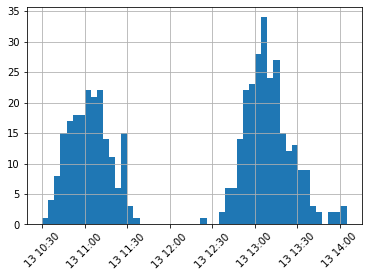

In [15]:
uitslag_prog['Eindtijd'].hist(bins=50, xrot=45)

Beschrijf de verdeling (scheef? multimodaal? normaal?). Verklaar wat je ziet.

De distributie van eindtijden is multimodaal (2 pieken). De distributie lijkt een een optelling van 2 normaalverdelingen te zijn. Dit is te verklaren doordat het tenamen op 2 verschillende tijdstippen zijn afgenomen (in de ochtend en in de middag).

Beide verdelingen lijkt enigszins rechtsscheef. Dit is grotendeels te verklaren doordat de verdeling vooral van onderen begrensd is: gespendeerde tijd kan niet minder dan 0 minuten zijn.

### Deel 3. Analyse attributen met behulp van centrummaten

In dit deel zullen we de vragen van het tentamen analyseren met behulp van de centrummaten

Bereken het gemiddelde van de score van elke vraag en sorteer de waardes van hoog naar laag. **Tip**: ga niet zelf code schrijven om deze berekeningen uit te voeren maar maak gebruik van de standaardfuncties van Pandas! 
  

In [16]:
score_mean = uitslag_prog.loc[:,uitslag_prog.dtypes == 'int64'].mean()

In [17]:
score_mean.sort_values(ascending = False)

Score_16    0.973510
Score_37    0.935982
Score_40    0.876380
Score_21    0.847682
Score_35    0.836645
Score_7     0.810155
Score_38    0.790287
Score_32    0.772627
Score_27    0.772627
Score_17    0.772627
Score_4     0.768212
Score_22    0.759382
Score_5     0.754967
Score_31    0.730684
Score_23    0.719647
Score_26    0.715232
Score_15    0.706402
Score_36    0.706402
Score_9     0.706402
Score_12    0.706402
Score_33    0.673289
Score_6     0.657837
Score_34    0.653422
Score_29    0.653422
Score_18    0.640177
Score_14    0.631347
Score_3     0.624724
Score_11    0.602649
Score_10    0.598234
Score_28    0.582781
Score_25    0.434879
Score_8     0.426049
Score_39    0.406181
Score_24    0.390728
Score_1     0.381898
Score_13    0.355408
Score_30    0.300221
Score_2     0.273731
Score_19    0.273731
Score_20    0.165563
dtype: float64

In [18]:
score_mean.sort_values(ascending = False, inplace = True)

Plot het gemiddelde per vraag in een barchart en daarna in een linechart. **Tip**: maak gebruik van de `plot()` functie van een Pandas dataframe.

<AxesSubplot:>

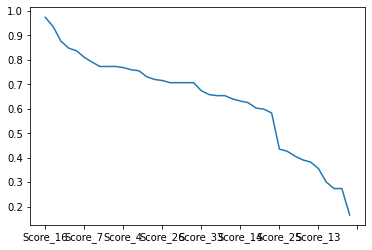

In [19]:
score_mean.plot()

<AxesSubplot:>

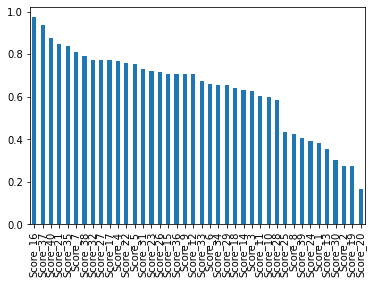

In [20]:
score_mean.plot(kind = 'bar')

Bereken de mediaan. 
- Wat kun je zeggen over de mean van een vraag als je de mediaan weet? Is de mean bijvoorbeeld altijd hoger of lager dan een bepaalde waarde gegeven de mediaan? 
- Is deze relatie er altijd?   

In [21]:
# Je ziet de volgende relatie:_
#  - gemiddelde < 0.5 dan mediaan = 0;
#  - gemiddelde >= 0.5 dan mediaan = 1.

# Dus: áls we de ene centrummaat weten, dán weten we de andere. Deze relatie
# geldt hier omdat er slechts 2 mogelijke waarden zijn (de waarde is van
# discreet meetniveau). In het algemeen geldt deze relatie niet (dus als er
# meerdere discrete waarden zijn, óf als de datatype continue is).
uitslag_prog.loc[:, uitslag_prog.columns != 'StudentNummer'].median().head(10)

Eindtijd    2016-10-13 12:52:38
Score_1                     0.0
Score_2                     0.0
Score_3                     1.0
Score_4                     1.0
Score_5                     1.0
Score_6                     1.0
Score_7                     1.0
Score_8                     0.0
Score_9                     1.0
dtype: object

Bereken de modus. 
- Waarom zie je voor deze centrummaat wél StudentNummer als kolom terug in het resultaat? 
- Waarom zie je meerdere rijen?
- Waarom bevatten sommige cellen NaN?

In [22]:
# De modus is een centrummaat die ook (mogelijk) nuttig is voor categoriale
# data (dit is StudentNummer), dus Pandas is slim genoeg om deze ook voor
# StudentNummer uit te rekenen.

# Een modus hoeft niet uniek te zijn, omdat verschillende waarden evenvaak
# voor kunnen komen. Zo ook hier.

# NaN betekent Not A Number. Voor deze attributen zijn er dus niet meerdere
# modi.

# Dit betekent dat elk van de 453 studentnummers precies 1 keer voorkomt, zij zijn dus allemaal de modus
# Er zijn een aantal eindtijden die vaker voorkomen, daarom zijn er meerdere rijen met eindtijden te zien
# Voor de vragen is er maar 1 modus: 0 of 1, daarom is daar altijd maar 1 rij gevuld

uitslag_prog.mode()

,StudentNummer,Eindtijd,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,...,Score_31,Score_32,Score_33,Score_34,Score_35,Score_36,Score_37,Score_38,Score_39,Score_40
0,1024103,2016-10-13 11:01:24,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1033850,2016-10-13 11:05:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1056270,2016-10-13 11:06:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1056963,2016-10-13 11:08:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1083292,2016-10-13 12:56:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,9838669,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,9853937,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,9855088,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,9888215,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Deel 4. Analyse attributen met behulp van spreidingsmaten
We gaan verder met het analyseren van de vragen, maar nu met behulp van enkele spreidingsmaten.

Bereken de variantie van elke vraag. Sorteer deze waardes.
- Wat zegt dit getal?
- Wat voor *kwalitatieve* uitspraak kun je doen over een vraag als de variantie hoog is?

In [23]:
# De variantie geeft de spreiding van de scores: hoe kleiner de variantie, hoe
# minder spreiding in het goed of fout beantwoorden van de vraag. Je zou van
# een vraag met een hoge variantie kunnen zeggen dat deze discriminerend is en
# dus de goede van de minder goede studenten scheidt.

uitslag_prog.loc[:, 'Score_1':'Score_40'].var().sort_values()

Score_16    0.025845
Score_37    0.060052
Score_40    0.108578
Score_21    0.129403
Score_35    0.136973
Score_20    0.138457
Score_7     0.154144
Score_38    0.166100
Score_32    0.176063
Score_27    0.176063
Score_17    0.176063
Score_4     0.178456
Score_22    0.183125
Score_5     0.185401
Score_31    0.197220
Score_2     0.199242
Score_19    0.199242
Score_23    0.202202
Score_26    0.204126
Score_12    0.207857
Score_15    0.207857
Score_9     0.207857
Score_36    0.207857
Score_30    0.210553
Score_33    0.220458
Score_6     0.225586
Score_34    0.226963
Score_29    0.226963
Score_13    0.229600
Score_18    0.230860
Score_14    0.233263
Score_3     0.234963
Score_1     0.236574
Score_24    0.238586
Score_11    0.239993
Score_10    0.240882
Score_39    0.241732
Score_28    0.243685
Score_8     0.245072
Score_25    0.246303
dtype: float64

Bereken de standaard deviatie. 
- Hoe verschilt deze maat van de variantie? 
- Is er een verband tussen de standaard deviatie en variantie? Welke van beide maten is intuitiever?

In [24]:
# De standaarddeviatie heeft dezelfde eenheid als de originele scores. Er is
# zeker een verband: de variatie is het kwadraat van de standaarddeviatie.
# Standaarddeviatie is intuitiever in de zin dat het makkelijker te vergelijken
# is met bijvoorbeeld het gemiddelde, omdat het dezelfde eenheid heeft.

# Merk op: de std() functie geeft foutmeldingen wanneer je niet specificeert welke attributen gebruikt moeten worden!

uitslag_prog.loc[:,'Score_1':'Score_40'].std().sort_values()

Score_16    0.160765
Score_37    0.245055
Score_40    0.329512
Score_21    0.359726
Score_35    0.370098
Score_20    0.372099
Score_7     0.392612
Score_38    0.407554
Score_32    0.419599
Score_27    0.419599
Score_17    0.419599
Score_4     0.422441
Score_22    0.427931
Score_5     0.430582
Score_31    0.444095
Score_2     0.446365
Score_19    0.446365
Score_23    0.449668
Score_26    0.451803
Score_12    0.455914
Score_15    0.455914
Score_9     0.455914
Score_36    0.455914
Score_30    0.458861
Score_33    0.469529
Score_6     0.474958
Score_34    0.476406
Score_29    0.476406
Score_13    0.479166
Score_18    0.480479
Score_14    0.482973
Score_3     0.484729
Score_1     0.486389
Score_24    0.488453
Score_11    0.489891
Score_10    0.490797
Score_39    0.491662
Score_28    0.493645
Score_8     0.495048
Score_25    0.496289
dtype: float64

Hieronder wordt de gemiddelde score per vraag geplot (als *bars*) en daarnaast de standaarddeviatie (als lijn).
- Is er op het oog een verband tussen de centrummaat en de spreidingsmaat?

<AxesSubplot:>

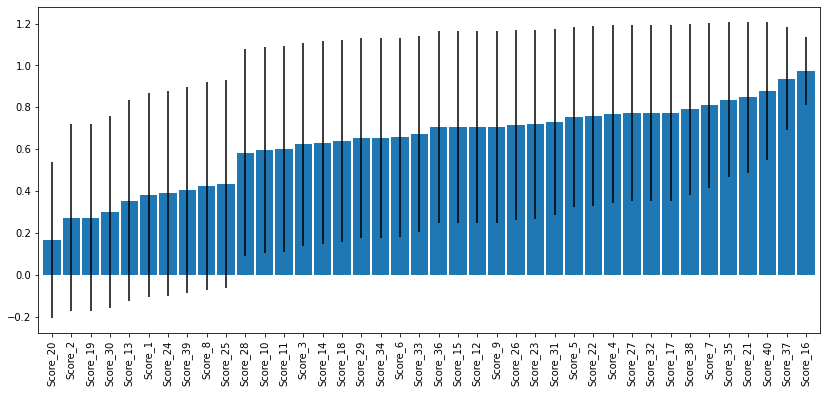

In [25]:
# Visualisatie 1
uitslag_prog.loc[:,'Score_1':'Score_40'].mean().sort_values().plot.bar(yerr=uitslag_prog.loc[:,'Score_1':'Score_40'].std(), width = 0.9, figsize=(14, 6))

<AxesSubplot:>

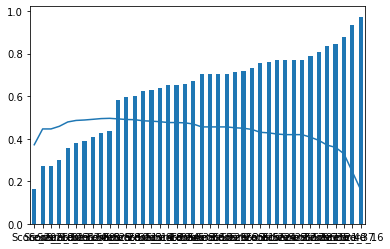

In [26]:
# Visualisatie 2
means = uitslag_prog.loc[:,'Score_1':'Score_40'].mean()
stds = uitslag_prog.loc[:,'Score_1':'Score_40'].std()
means_stds = pd.concat([means, stds], axis=1)

means_stds.sort_values(by=0, inplace=True)

means_stds[0].plot(kind='bar')
means_stds[1].plot(kind='line')

## Deel 5. Analyse van studenten
In deel 3 en 4 hebben we de kolommen (attributen) geanalyseerd, nu gaan we de rijen (de verschillende studenten in de dataset) analyseren.

Bepaal de gemiddelde scores per student en toon de hoogstscorende eerst. 
- **Tip 1**: we hebben de `mean` functie hiervoor gebruikt om het gemiddelde van kolommen te berekenen, nu wil je eigenlijk het gemiddelde van rijen berekenen... zoek naar de inputparameter voor de `mean` functie waarmee je dit makkelijk kunt fixen! 
- **Tip 2**: als je een gemiddelde krijgt groter dan 1, kijk dan goed naar welke kolommen je als input mee geeft

In [27]:
uitslag_prog.loc[:,'Score_1':'Score_40'].mean(axis = 1).sort_values(ascending=False).head(10)

417    1.000
232    0.975
50     0.950
314    0.950
146    0.950
109    0.925
429    0.925
21     0.925
27     0.900
406    0.900
dtype: float64

***Tip 3: het kan handig zijn om zelf de dataset uit te breiden met nieuwe informatie***

Onderstaande code berekent het cijfer voor elke student. Hierbij wordt rekening gehouden met de *cesuur* (= gokkans):
  1. cijfer = $\frac{9}{30}(\sum_{i=1}^{40}{Score.i}-10) + 1$
  2. eindcijfer = $\max(1, cijfer)$.

In [28]:
uitslag_prog['Cijfer'] = (9/30)*(uitslag_prog.loc[:,'Score_1':'Score_40'].sum(axis = 1) - 10) + 1
uitslag_prog['Eindcijfer'] = np.maximum( uitslag_prog['Cijfer'], [1]*uitslag_prog.shape[0] )

In [29]:
uitslag_prog

,StudentNummer,Eindtijd,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,...,Score_33,Score_34,Score_35,Score_36,Score_37,Score_38,Score_39,Score_40,Cijfer,Eindcijfer
0,8751631,2016-10-13 13:24:46,0,0,0,1,0,0,1,1,...,1,0,0,0,1,1,0,0,2.2,2.2
1,4897318,2016-10-13 13:06:16,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,8.2,8.2
2,7749231,2016-10-13 13:06:39,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0.1,1.0
3,2170653,2016-10-13 11:11:01,0,0,1,1,1,0,1,0,...,1,1,1,1,1,1,0,0,4.9,4.9
4,5540046,2016-10-13 13:22:07,1,0,1,1,1,1,1,0,...,1,1,1,0,1,1,1,1,7.3,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1125404,2016-10-13 10:54:48,0,0,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,5.5,5.5
449,8552327,2016-10-13 11:08:35,1,0,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,7.6,7.6
450,6831151,2016-10-13 13:17:02,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,1,5.5,5.5
451,4305117,2016-10-13 14:04:10,1,0,1,1,0,1,1,1,...,1,0,1,1,1,1,0,1,6.1,6.1


Bepaal het totale gemiddelde over alle studenten. Doe dit nogmaals, maar dan alleen de studenten die een voldoende hebben gescoord.

In [30]:
uitslag_prog['Eindcijfer'].mean()

5.619205298013245

In [31]:
uitslag_prog.loc[uitslag_prog['Eindcijfer']>=5.5, 'Eindcijfer'].mean()

6.965168539325843

Plot een histogram van de eindcijfers met de `plot.hist()` functie van een dataframe. Met Matplotlib kan het *fancier*, maar dat komt later! Wat kun je zeggen over de verdeling (scheef? multimodaal? normaal?) En voor cijfer?

<AxesSubplot:ylabel='Frequency'>

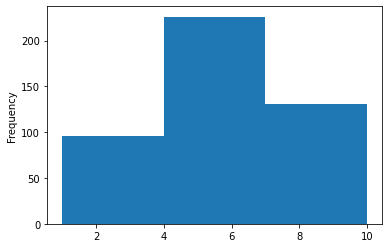

In [32]:
uitslag_prog['Eindcijfer'].plot.hist(bins = 3)

Laten we aannemen dat de cijfers normaal verdeeld zijn. Bepaal de parameters van een normaalverdeling voor de eindcijfers van alle studenten.


Een normaalverdeling wordt beschreven door 2 parameters:  
1. Het gemiddelde $\mu$  
2. De standaarddeviatie $\sigma$

Als we de cijferdistributie willen benaderen met een normaalverdeling, dan geldt:
1. $\mu = $ uitslag_prog.Cijfer.mean()
2. $\sigma = $ uitslag_prog.Cijfer.std()

Sla het gemiddelde op als `mu_cijfers` en de standaarddeviatie als `sigma_cijfers` en run dan onderstaande code de normaalverdeling als formule (`normal_cijfers`) te genereren en om deze normaalverdeling te visualiseren. In de visualisatie worden ook de originele gegevens getoond, je ziet dat er *bijna* sprake is van een normaalverdeling.

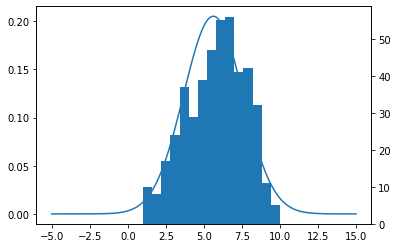

In [33]:
# Geef deze variabelen de correcte waarde
mu_cijfers = uitslag_prog['Eindcijfer'].mean()
sigma_cijfers = uitslag_prog['Eindcijfer'].std()

# Pas deze code niet aan
normal_cijfers = sp.stats.norm(mu_cijfers, sigma_cijfers)
x = np.linspace(-5,15,1000)
y = normal_cijfers.pdf(x)

fig, ax1 = plt.subplots()
ax1.plot(x,y)
ax2 = ax1.twinx()
ax2.hist(uitslag_prog.Eindcijfer, bins=15)
plt.show()

Bereken:
 * $\Pr(C < 6)$. **Tip**: gebruik `normal_cijfers` en de functie `cdf()` 
 * $\Pr(C > 8,5)$
 * $\Pr(C > 10)$. Leg uit waarom dit groter dan 0 is.
 * $\Pr(6 < C < 8,5)$.
 * $\Pr(C < 6 \lor C > 8,5) \>$ ($\lor$ is wiskundige notatie voor OR)


In [34]:
c_below_6 = normal_cijfers.cdf(6)
c_below_8 = normal_cijfers.cdf(8.5)
c_above_8 = 1 - c_below_8
c_between_6_and_8 = c_below_8 - c_below_6
c_outside_6_and_8 = 1 - c_between_6_and_8     # of c_below_6 + c_above_8
c_above_10 = 1 - normal_cijfers.cdf(10)

# P(C > 10) zal groter zijn dan 0, omdat de "staarten" van de normaalverdeling
# oneindig doorgaan. De kansen gaan wel heel snel naar 0, maar zullen nooit
# precies 0 zijn.

pd.Series(
    [c_below_6, c_above_8, c_above_10, c_between_6_and_8, c_outside_6_and_8],
    ["P(C < 6)", "P(C > 8.5)", "P(C > 10)", "P(6 < C < 8.5)", "P(C < 6 OR C > 8.5)"]
)

P(C < 6)               0.577643
P(C > 8.5)             0.069199
P(C > 10)              0.012119
P(6 < C < 8.5)         0.353158
P(C < 6 OR C > 8.5)    0.646842
dtype: float64

Hier visualiseren we het voorlaatste scenario, gewoon omdat het kan:


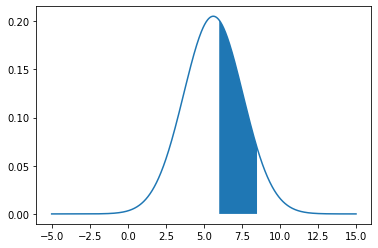

In [35]:
plt.plot(x,y)
plt.fill_between(x,y, where = (x > 6) & (x < 8.5))
plt.show()

Welk cijfer moet je minimaal hebben om bij de top 10% van de klas te behoren?


In [36]:
normal_cijfers.ppf(0.9)

8.110726354941583